# Plot sea ice freezing line 

Sea ice freezing (SOSE)

### Import packages

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import matplotlib.patches as mpatches
import pandas as pd
from sklearn import manifold
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import cmocean
from xhistogram.xarray import histogram
### os tools
import os.path
from glob import glob
import load_and_preprocess as lp
import file_io as io
import density
import random
import gsw

# extra plotting features
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# save figure?
saveFig = True

# Sea ice freezing line

### Read in sea ice freezing data (created from SOSE data in Matlab)

In [2]:
# load winter sea ice freezing maps
dp = io.load_sose_SIfreeze(file_name="physical_fields/SIfreeze_SOSE_R1.nc")

# show contents
dp

<xarray.Dataset>
Dimensions:   (lon: 2160, lat: 198)
Coordinates:
  * lon       (lon) float64 -179.9 -179.8 -179.6 -179.4 ... 179.6 179.8 179.9
  * lat       (lat) float64 -77.87 -77.71 -77.54 -77.37 ... -45.37 -45.21 -45.04
Data variables:
    SIfreeze  (lat, lon) float64 ...
Attributes:
    Source:       SOSE iteration 100, 2005-2010
    Source URL:   http://sose.ucsd.edu/sose_stateestimation_data_05to10.html
    Description:  JAS (Austral winter) average 2005-2010

In [3]:
# show contents of SIfreeze variable 
dp.SIfreeze

<xarray.DataArray 'SIfreeze' (lat: 198, lon: 2160)>
[427680 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.9 -179.8 -179.6 -179.4 ... 179.6 179.8 179.9
  * lat      (lat) float64 -77.87 -77.71 -77.54 -77.37 ... -45.37 -45.21 -45.04
Attributes:
    Units:          [kg/m^2/s]
    Long name:      Seaice package: Ocean surface freshwater flux
    Variable name:  SIfreeze
    Threshold:      1e-05
    Convention:     > 0 increases salt

In [4]:
# load fronts
pf = io.load_front("fronts/pf_kim.txt")
saccf = io.load_front("fronts/saccf_kim.txt")
saf = io.load_front("fronts/saf_kim.txt")
sbdy = io.load_front("fronts/sbdy_kim.txt")

In [5]:
# select geographic extent of the plot (keep consistent for all plots in this notebook)
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -50

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


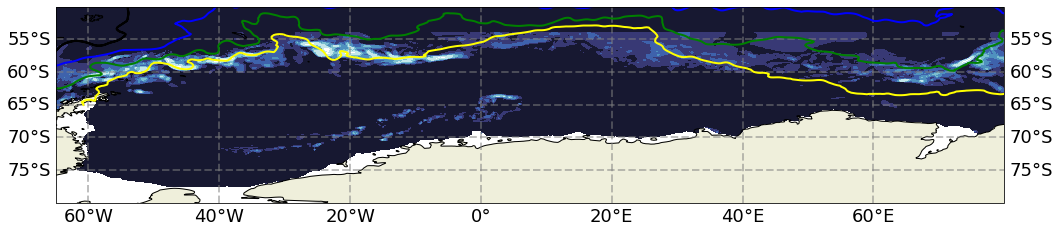

In [6]:
# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(dp.lon, dp.lat, dp.SIfreeze,
                levels=[0.0, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5],
                transform=ccrs.PlateCarree(), vmin=0.0, vmax=6e-5,
                cmap=cmocean.cm.ice)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())

# add coast
ax.coastlines(resolution='50m')

# add grid
#ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#             linewidth=2, color='gray', alpha=0.5, linestyle='--')

# format ticklines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlabels_bottom = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
gl.ylocator = mticker.FixedLocator([-75,-70,-65,-60,-55,-50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}

# add land
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
#l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black", alpha=0.5)
#l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue", alpha=0.5)
#l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green", alpha=0.5)
#l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow", alpha=0.5)
#labels = ['SAF', 'PF', 'SACCF', 'SBDY']
#plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
#           loc='lower right', fancybox=True)

# save figure
if saveFig==True:
    plt.savefig("plots/physical_fields/SeaIceFreezing_SOSE_winter_R1.png", bbox_inches="tight")
    plt.savefig("plots/physical_fields/SeaIceFreezing_SOSE_winter_R1.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

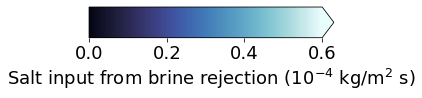

In [9]:
# separate colorbar
a = np.array([[0.0, 0.6]])    
plt.figure(figsize=(4.25, 0.71))
img = plt.imshow(a, cmap=cmocean.cm.ice)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax, extend="max")
cbar.ax.tick_params(labelsize=18)
cbar.set_label("Salt input from brine rejection (10$^{-4}$ kg/m$^2$ s)", fontsize=18)

if saveFig==True:
    plt.savefig('plots/physical_fields/brine_colorbar_R1.pdf', bbox_inches='tight')
    plt.savefig('plots/physical_fields/brine_colorbar_R1.png', bbox_inches='tight')
    plt.show()
    plt.close()

In [8]:
np.histogram(dp.SIfreeze.dropna(dim="lat",how="any").values.flatten())

(array([188727,  13110,   3394,   1254,    462,    211,    105,     60,
            18,     19]),
 array([0.00000000e+00, 1.75404993e-05, 3.50809986e-05, 5.26214978e-05,
        7.01619971e-05, 8.77024964e-05, 1.05242996e-04, 1.22783495e-04,
        1.40323994e-04, 1.57864494e-04, 1.75404993e-04]))